# **Exploratory data Analysis**

# EDA and its 10 important steps

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = sns.load_dataset('titanic')
df1= sns.load_dataset('tips')


In [3]:
# Step 1: Data shape
df.shape

(891, 15)

# Smple
- If Dataset is too large to fit in memory, we can use sample() to get a random sample of the data.
- after selecting some data meke analysis on it.
- When analysis complete we can drop the sample from memory. and run all script with original dataset.
  ## df = df.sample(1000)

In [4]:
rows, cols = df.shape
print("Number of rows:", rows)  # instance of dataframe
print("Number of columns:", cols)   # instance of dataframe/series

Number of rows: 891
Number of columns: 15


In [5]:
# Step 2: Data Structure/ info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Step 3: Finding missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Percent calculation of missing values
df.isnull().sum() / df.shape[0] * 100
# df.isnull().sum() / 891 * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [19]:
# Step 4: Split Variables for new column needed / Feature Engineering
city = pd.DataFrame(np.array([['Lahore, Pakistan',67,100], ['Dehli, India',5,6], ['Mumbai, India',5,6], ['Karachi, Pakistan',85,49]]), 
                    columns=['address', 'males','females'])
city


,address,males,females
0,"Lahore, Pakistan",67,100
1,"Dehli, India",5,6
2,"Mumbai, India",5,6
3,"Karachi, Pakistan",85,49


In [20]:
city[['city', 'country']] = city['address'].str.split(', ', expand=True)
city

,address,males,females,city,country
0,"Lahore, Pakistan",67,100,Lahore,Pakistan
1,"Dehli, India",5,6,Dehli,India
2,"Mumbai, India",5,6,Mumbai,India
3,"Karachi, Pakistan",85,49,Karachi,Pakistan


In [21]:
# Step 5: Type Casting / conversion of Data types
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  4 non-null      object
 1   males    4 non-null      object
 2   females  4 non-null      object
 3   city     4 non-null      object
 4   country  4 non-null      object
dtypes: object(5)
memory usage: 288.0+ bytes


In [32]:
# To convert into an int
city[['males', 'females']] = city[['males', 'females']].astype('int')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  4 non-null      object
 1   males    4 non-null      int32 
 2   females  4 non-null      int32 
 3   city     4 non-null      object
 4   country  4 non-null      object
dtypes: int32(2), object(3)
memory usage: 256.0+ bytes


In [33]:
# To convert into a string
city[['city', 'country']] = city[['city', 'country']].astype('string')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  4 non-null      object
 1   males    4 non-null      int32 
 2   females  4 non-null      int32 
 3   city     4 non-null      string
 4   country  4 non-null      string
dtypes: int32(2), object(1), string(2)
memory usage: 256.0+ bytes


In [35]:
# Step 6: Summary Statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# Step 7: Value Count of specific column
df.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [41]:
# Step 8: Deal with duplicates (remove) / and\or null values (mean, meadian ----- other methods)
df [df.embark_town == 'Queenstown'] # this will show the people only embarked from Queenstown in Titanic.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


<AxesSubplot:xlabel='age', ylabel='Count'>

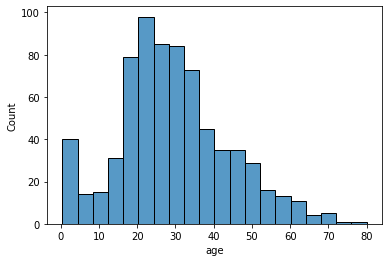

In [52]:
# Step 9: Check Normality/ standard normal distribution
sns.histplot(df['age'])

In [55]:
# measure its skewness and kurtosis
df['age'].agg(['skew', 'kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

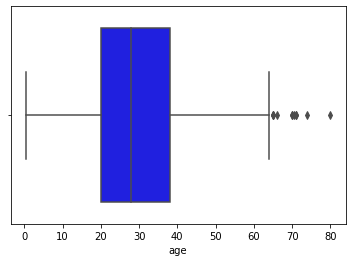

In [60]:
sns.boxplot(df['age'], color= 'blue')

In [64]:
# Step 10: Check Correlation
corr = df.corr(method='pearson') # you can also use spearman or kendall
corr
# df.corr() ---> this will show the correlation between all the variables


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229,-0.557080,-0.203367
pclass,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531,0.094632,0.129440
age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249,0.212646,0.138077
sibsp,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262,-0.297677,-0.800592
parch,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360,-0.384836,-0.662292
fare,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000,-0.254023,-0.437063
adult_male,-0.557080,0.094632,0.212646,-0.297677,-0.384836,-0.254023,1.000000,0.404744
alone,-0.203367,0.129440,0.138077,-0.800592,-0.662292,-0.437063,0.404744,1.000000


<AxesSubplot:>

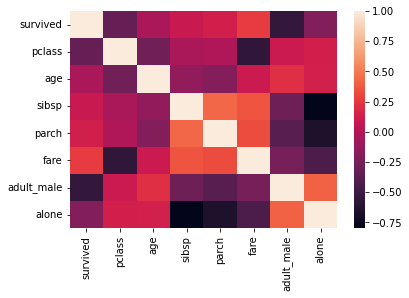

In [66]:
sns.heatmap(corr)


<AxesSubplot:>

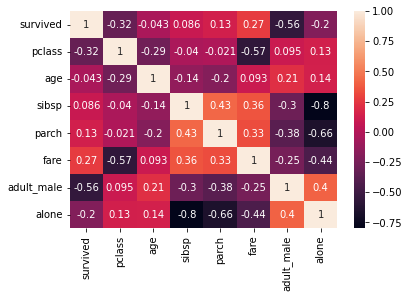

In [67]:
sns.heatmap(corr, annot=True)
# this will show numbers with colors

In [69]:
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229,-0.557080,-0.203367
pclass,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531,0.094632,0.129440
age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249,0.212646,0.138077
sibsp,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262,-0.297677,-0.800592
parch,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360,-0.384836,-0.662292
fare,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000,-0.254023,-0.437063
adult_male,-0.557080,0.094632,0.212646,-0.297677,-0.384836,-0.254023,1.000000,0.404744
alone,-0.203367,0.129440,0.138077,-0.800592,-0.662292,-0.437063,0.404744,1.000000


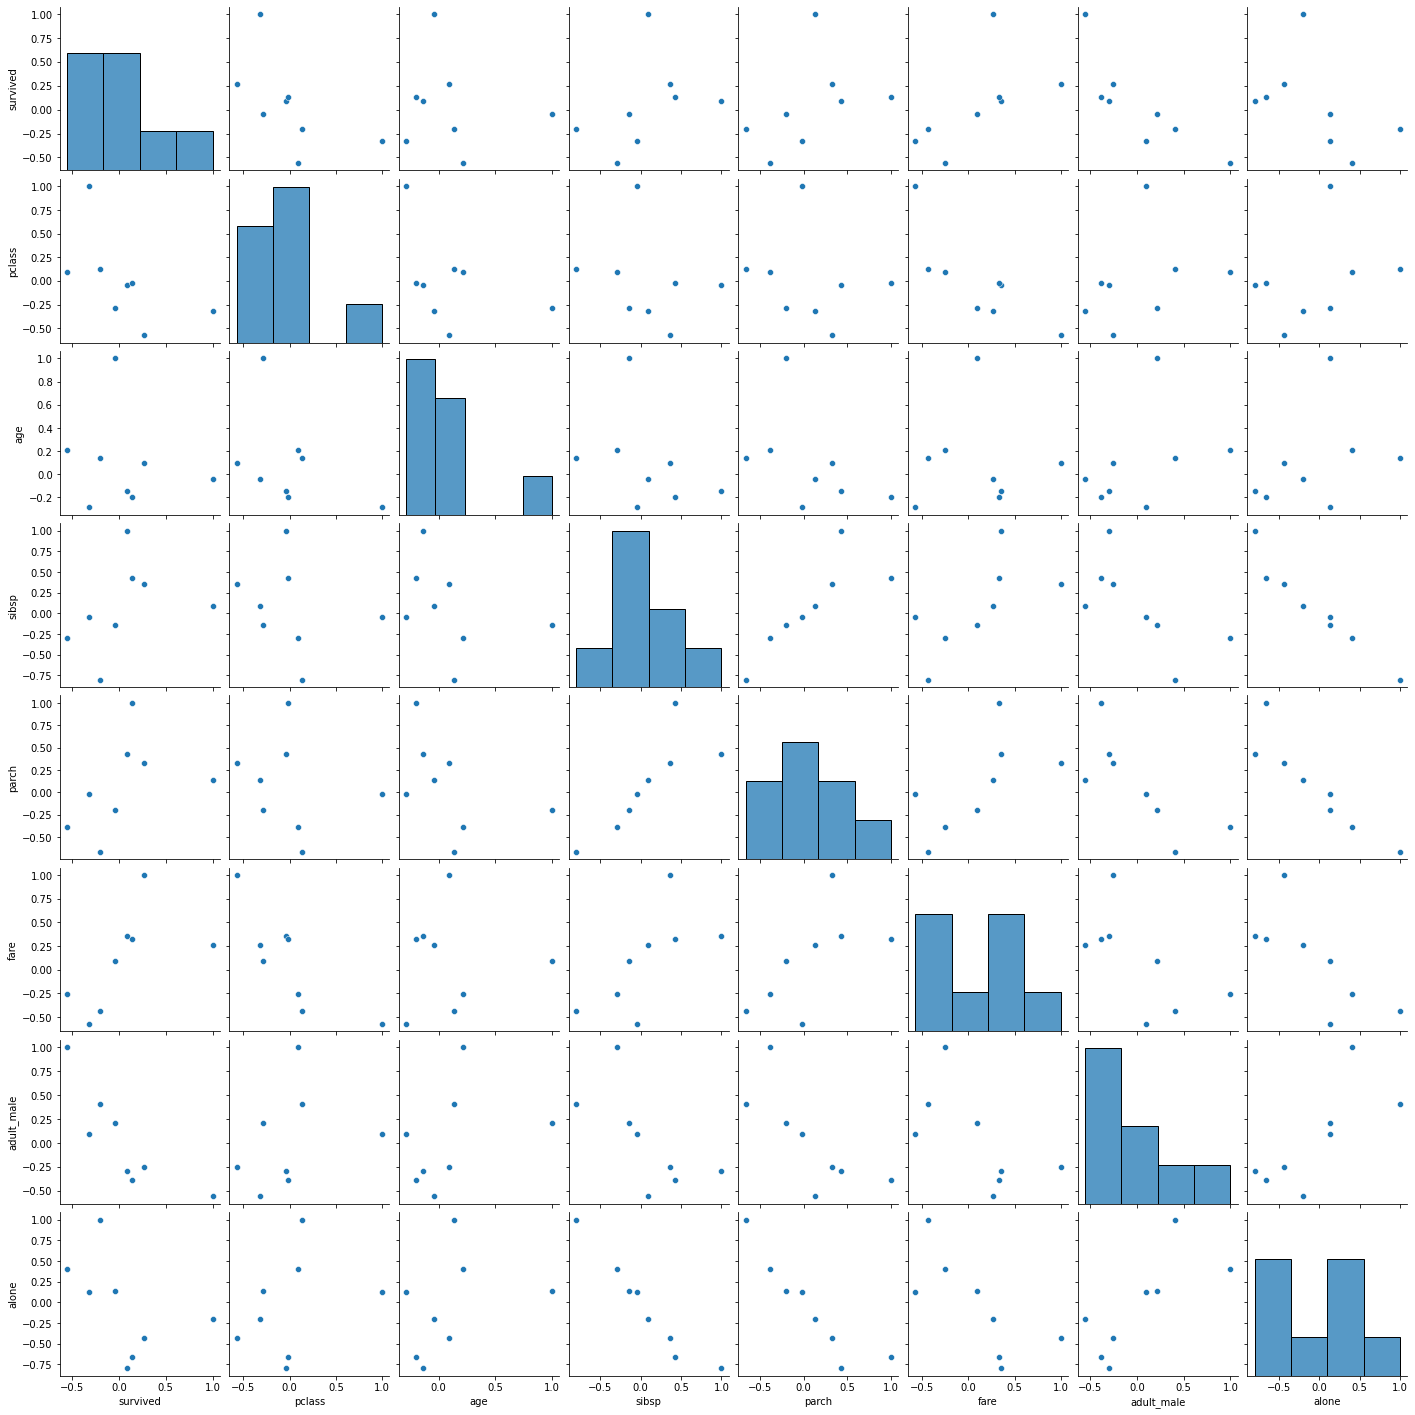

In [68]:
sns.pairplot(corr)